In [1]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [12]:
contours = pd.read_csv('contours.csv')
contours.head()

,time,note,num_smp,duration,num_ep,avg_mag_roc,avg_mag_acc,max_amp,min_amp,num_max,num_min,d_above,d_below,d_inc,d_dec
0,0.019365,28,170,0.003832,1,214,27,6581,-4000,2,2,0.001655,0.002177,0.001859,0.001973
1,0.023175,28,168,0.003787,1,212,23,6731,-3981,2,2,0.001678,0.002109,0.001905,0.001882
2,0.026984,28,168,0.003787,1,214,24,7048,-4118,2,2,0.001655,0.002132,0.001791,0.001995
3,0.030816,28,168,0.003787,1,210,24,7063,-4264,2,2,0.001655,0.002132,0.001882,0.001905
4,0.034626,28,169,0.003810,1,214,22,7383,-4318,2,2,0.001655,0.002154,0.001927,0.001882


In [72]:
# pandas not trimming spaces automatically is a bit absurd, no?
contour_predictors = contours.drop(["time", " note"], axis=1)
contour_results = contours[" note"]

train_len = len(contours) * 3 // 4
train_predictors = contour_predictors[0:train_len]
test_predictors = contour_predictors[train_len:]
train_results = contour_results[0:train_len]
test_results = contour_results[train_len:]

## Random

In [5]:
print( 1 / 24 )

0.041666666666666664


## LDA

In [52]:
lda = LinearDiscriminantAnalysis()
model = lda.fit(contour_predictors, contour_results)
predictions = model.predict(contour_predictors)

In [53]:
num_right = 0
for i in range( len(predictions) ):
    if(predictions[i] == contours[" note"][i]):
        num_right += 1
        
print(num_right)
print(num_right / len(contours))

num_right_lda = num_right

15304
0.19580348004094167


In [55]:
lda = LinearDiscriminantAnalysis()
model = lda.fit(train_predictors, train_results)
predictions = model.predict(test_predictors)

In [56]:
num_right = 0
for i in range( len(predictions) ):
    if(predictions[i] == test_results.tolist()[i]):
        num_right += 1
        
print(num_right)
print(num_right / len(test_results))

num_right_lda2 = num_right

3294
0.16857727737973388


## GNB

In [61]:
gnb = GaussianNB()
model = gnb.fit(contour_predictors, contour_results)
predictions = model.predict(contour_predictors)

In [62]:
num_right = 0
for i in range( len(predictions) ):
    if(predictions[i] == contours[" note"][i]):
        num_right += 1
        
print(num_right)
print(num_right / len(contours))

num_right_gnb = num_right

8452
0.10813715455475947


In [63]:
gnb = GaussianNB()
model = gnb.fit(train_predictors, train_results)
predictions = model.predict(test_predictors)

In [64]:
num_right = 0
for i in range( len(predictions) ):
    if(predictions[i] == test_results.tolist()[i]):
        num_right += 1
        
print(num_right)
print(num_right / len(test_results))

num_right_gnb2 = num_right

1725
0.0882804503582395


## Random Forest

In [65]:
forest = RandomForestClassifier()
model = forest.fit(contour_predictors, contour_results)
predictions = model.predict(contour_predictors)

In [66]:
num_right = 0
for i in range( len(predictions) ):
    if(predictions[i] == contours[" note"][i]):
        num_right += 1
        
print(num_right)
print(num_right / len(contours))

num_right_forest = num_right

78156
0.9999488229273286


In [67]:
forest = RandomForestClassifier()
model = forest.fit(train_predictors, train_results)
predictions = model.predict(test_predictors)

In [68]:
num_right = 0
for i in range( len(predictions) ):
    if(predictions[i] == test_results.tolist()[i]):
        num_right += 1
        
print(num_right)
print(num_right / len(test_results))

num_right_forest2 = num_right

17342
0.8875127942681679


## Linear Regression

In [40]:
lm = LinearRegression()
lm.fit(contour_predictors, contour_results)

coefficients = pd.DataFrame(data={"predictor": contour_predictors.columns, \
                                  "coefficient": lm.coef_})
predictions = lm.predict(contour_predictors)
predictions = predictions.round()

comment = """
# coefficient, error, t values
MSE = (sum((auto_predictee - predictions) ** 2)) / \
    (len(auto_predictors) - len(auto_predictors.columns) - 1)
RSE = math.sqrt(MSE)

variance = MSE * (np.linalg.inv(np.dot(auto_predictors.T,auto_predictors)).diagonal())
standard_deviation = np.sqrt(variance)

results = pd.DataFrame()
results["predictors"] = auto_predictors.columns
results["coefficient"] = coefficients["coefficient"]
results["variance"] = variance
results["std. error"] = standard_deviation
results["t-value"] = coefficients["coefficient"] / standard_deviation

print("Mean squared error:")
print(MSE)
print(results)
"""


In [42]:
num_right = 0
for i in range( len(predictions) ):
    if(predictions[i] == contour_results.to_list()[i]):
        num_right += 1
        
print(num_right)
print(num_right / len(contours))

num_right_lg = num_right

31512
0.4031729785056295


In [76]:
lm = LinearRegression()
lm.fit(train_predictors, train_results)

coefficients = pd.DataFrame(data={"predictor": test_predictors.columns, \
                                  "coefficient": lm.coef_})
predictions = lm.predict(test_predictors)
predictions = predictions.round()

In [77]:
num_right = 0
for i in range( len(predictions) ):
    if(predictions[i] == test_results.tolist()[i]):
        num_right += 1
        
print(num_right)
print(num_right / len(test_results))

num_right_lg2 = num_right

7100
0.3633572159672467


## Perceptron

In [36]:
def multiclass_perceptron(examples, targets, num_classes, num_iterations=1, previous_weights = None):
    num_examples, num_features = examples.shape
    weights = previous_weights
    if weights is None:
        weights = np.zeros(num_classes * num_features)
        weights = weights.reshape(num_classes, num_features)
    
    for i in range(num_iterations):
        for i in range(num_examples):
            example = examples[i]
            target = targets[i]
            predicted = 0
            predicted_score = np.dot(example, weights[0])
            
            # get the dot product of w and each F(X_t,y), and record the highest scoring
            for j in range(1, num_classes):
                score = np.dot(example, weights[j])
                if(score > predicted_score):
                    predicted = j
                    predicted_score = score
            
            # if there was a mistake, update weights
            if(predicted != target):
                weights[target] = weights[target] + example 
                weights[predicted] = weights[predicted] - example
    
    return weights

def test_multiclass(examples, targets, weights, num_classes):
    num_examples = examples.shape[0]
    num_correct = 0
    
    for i in range(num_examples):
        example = examples[i]
        target = targets[i]
        
        predicted = 0
        predicted_score = np.dot(example, weights[0])

        for j in range(1, num_classes):
            score = np.dot(example, weights[j])
            if(score > predicted_score):
                predicted = j
                predicted_score = score
                    
        if target == predicted:
            num_correct += 1
    
    return num_correct

In [50]:
perceptron_predictors = contour_predictors.to_numpy()
perceptron_results = (contour_results - 28).to_numpy()
num_classes = 24

weights = multiclass_perceptron(perceptron_predictors, perceptron_results, num_classes, num_iterations=10)
num_right = test_multiclass(perceptron_predictors, perceptron_results, weights, num_classes)

print(num_right)
print(num_right / len(contours))
num_right_perceptron = num_right

5649
0.07227482088024564


In [49]:
perceptron_predictors = train_predictors.to_numpy()
perceptron_results = (train_results - 28).to_numpy()
perceptron_predictors2 = test_predictors.to_numpy()
perceptron_results2 = (test_results - 28).to_numpy()
num_classes = 24

weights = multiclass_perceptron(perceptron_predictors, perceptron_results, num_classes, num_iterations=10)
num_right = test_multiclass(perceptron_predictors2, perceptron_results2, weights, num_classes)

print(num_right)
print(num_right / len(test_predictors))
num_right_perceptron2 = num_right

195
0.009979529170931423


In [78]:
print("Perceptron")
print(num_right_perceptron / len(contours))
print(num_right_perceptron2 / len(test_predictors))
print("GNB")
print(num_right_gnb / len(contours))
print(num_right_gnb2 / len(test_predictors))
print("Forest")
print(num_right_forest / len(contours))
print(num_right_forest2 / len(test_predictors))
print("LDA")
print(num_right_lda / len(contours))
print(num_right_lda2 / len(test_predictors))
print("Linear Regression")
print(num_right_lg / len(contours))
print(num_right_lg2 / len(test_predictors))

Perceptron
0.07227482088024564
0.009979529170931423
GNB
0.10813715455475947
0.0882804503582395
Forest
0.9999488229273286
0.8875127942681679
LDA
0.19580348004094167
0.16857727737973388
Linear Regression
0.4031729785056295
0.3633572159672467


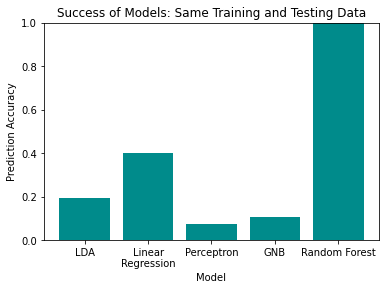

In [94]:
import matplotlib.pyplot as pyplot

x = ['LDA', 'Linear\nRegression', 'Perceptron', 'GNB', 'Random Forest']
correct_predictions = np.array([num_right_lda, num_right_lg, num_right_perceptron, num_right_gnb, num_right_forest])
correct_predictions = correct_predictions / len(contours)

x_pos = [i for i, _ in enumerate(x)]

pyplot.bar(x_pos, correct_predictions, color='darkcyan')
pyplot.xlabel("Model")
pyplot.ylabel("Prediction Accuracy")
pyplot.title("Success of Models: Same Training and Testing Data")
pyplot.ylim([0, 1.0])

pyplot.xticks(x_pos, x)

pyplot.show()

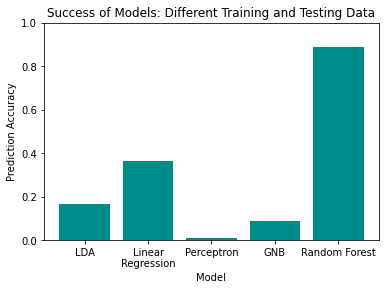

In [95]:
import matplotlib.pyplot as pyplot

x = ['LDA', 'Linear\nRegression', 'Perceptron', 'GNB', 'Random Forest']
correct_predictions = np.array([num_right_lda2, num_right_lg2, num_right_perceptron2, num_right_gnb2, num_right_forest2])
correct_predictions = correct_predictions / len(test_predictors)

x_pos = [i for i, _ in enumerate(x)]

pyplot.bar(x_pos, correct_predictions, color='darkcyan')
pyplot.xlabel("Model")
pyplot.ylabel("Prediction Accuracy")
pyplot.title("Success of Models: Different Training and Testing Data")
pyplot.ylim([0, 1.0])

pyplot.xticks(x_pos, x)

pyplot.show()

## LDA limited

In [7]:
contour_predictors = contours[[" duration", " num_smp"]]
contour_results = contours[" note"]

lda = LinearDiscriminantAnalysis()
model = lda.fit(contour_predictors, contour_results)
predictions = model.predict(contour_predictors)

In [8]:
num_right = 0
for i in range( len(predictions) ):
    if(predictions[i] == contours[" note"][i]):
        num_right += 1
        
print(num_right)
print(num_right / len(contours))

7631
0.09763306038894576


## LDA less training

In [14]:
contours_reduced = contours[contours["time"] % 0.5 < 0.2]
contours_reduced = contours_reduced[contours_reduced["time"] % 0.5 > 0.02]

contour_predictors = contours_reduced.drop(["time", " note"], axis=1)
contour_results = contours_reduced[" note"]

lda = LinearDiscriminantAnalysis()
model = lda.fit(contour_predictors, contour_results)
predictions = model.predict(contour_predictors)

num_right = 0
for i in range( len(predictions) ):
    if(predictions[i] == contours[" note"][i]):
        num_right += 1
        
print(num_right)
print(num_right / len(contours_reduced))

1465
0.053189558145445306


This suggests that the model is not correctly predicting at all

In [15]:
contours_reduced = contours[contours["time"] % 1 < 0.2]
contours_reduced = contours_reduced[contours_reduced["time"] % 1 > 0.02]

contour_predictors = contours_reduced.drop(["time", " note"], axis=1)
contour_results = contours_reduced[" note"]

lda = LinearDiscriminantAnalysis()
model = lda.fit(contour_predictors, contour_results)
predictions = model.predict(contour_predictors)

num_right = 0
for i in range( len(predictions) ):
    if(predictions[i] == contours[" note"][i]):
        num_right += 1
        
print(num_right)
print(num_right / len(contours_reduced))

575
0.0419340723453909


In [16]:
contours_reduced = contours[contours["time"] % 1 < 0.03]
contours_reduced = contours_reduced[contours_reduced["time"] % 1 > 0.02]

contour_predictors = contours_reduced.drop(["time", " note"], axis=1)
contour_results = contours_reduced[" note"]

lda = LinearDiscriminantAnalysis()
model = lda.fit(contour_predictors, contour_results)
predictions = model.predict(contour_predictors)

num_right = 0
for i in range( len(predictions) ):
    if(predictions[i] == contours[" note"][i]):
        num_right += 1
        
print(num_right)
print(num_right / len(contours_reduced))

13
0.022071307300509338
